In [1]:
#dataset:banknotes.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
df.shape

(1372, 5)

In [9]:
# seperate ip and op

x=df.drop('Class',axis=1)
y=df['Class']

In [10]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [13]:
df['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

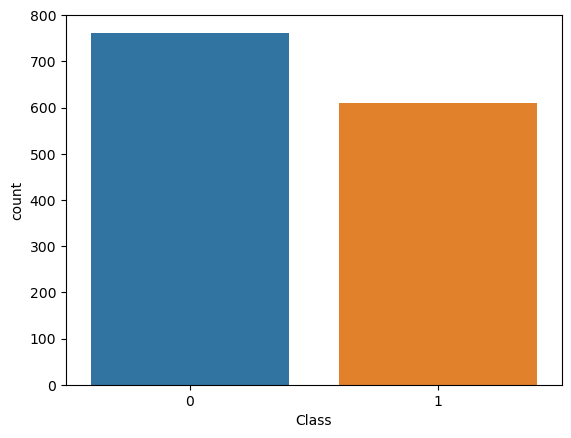

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x=y);

# cross validation

In [1]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.25)

In [39]:
x_train.shape #op of x_test

(1029, 4)

In [17]:
y_train.shape

(1029,)

# build the model

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt=DecisionTreeClassifier(random_state=0)

In [22]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
# predict on test data

In [30]:
y_pred=dt.predict(x_test)

In [26]:
y_pred 

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [40]:
y_test  #actual values

1023    1
642     0
1196    1
31      0
253     0
       ..
866     1
361     0
703     0
328     0
530     0
Name: Class, Length: 343, dtype: int64

In [38]:
result=pd.DataFrame({'actual':y_test,'predicted':y_pred})
result

,actual,predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


# model evaluation

In [41]:
# confusion matrix

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

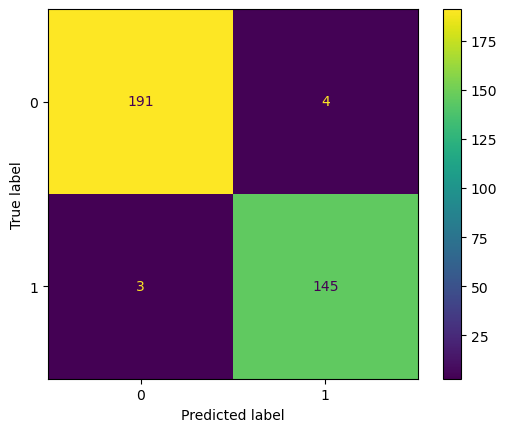

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [ ]:
'''insight:
0 is original , 1 is fake
3-model predicted original but it was fake(false+positive)
145-model predicted fake and it was fake(true + negative)
191-model predicted original and it was original(true+positive)
4-model predicted fake but it was original(false+negative)'''

In [44]:
# classification report

In [45]:
from sklearn.metrics import classification_report 

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [47]:
# accuracy

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9795918367346939

In [49]:
# visualize the tree

In [51]:
from sklearn.tree import plot_tree

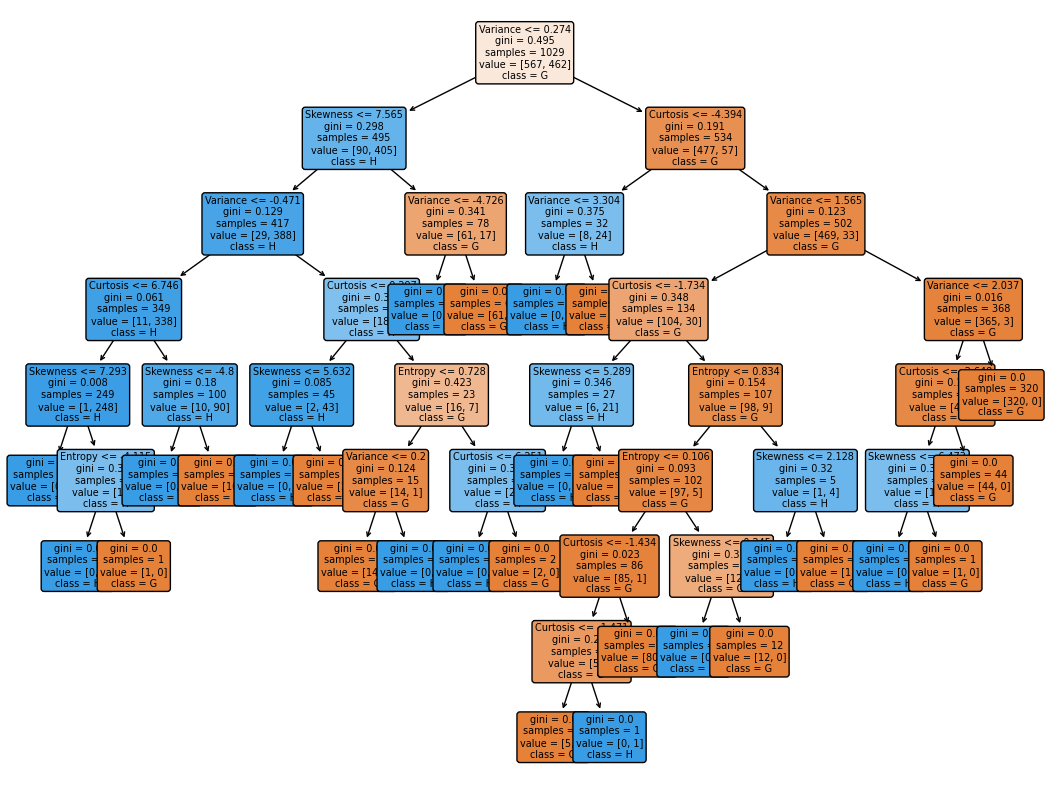

In [61]:
plt.figure(figsize=(13,10))
plot_tree(dt,rounded=True,class_names=['G','H'],feature_names=x.columns,filled=True,fontsize=7);

In [62]:
dt.feature_importances_

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

In [63]:
# plot barplot to visualize importance

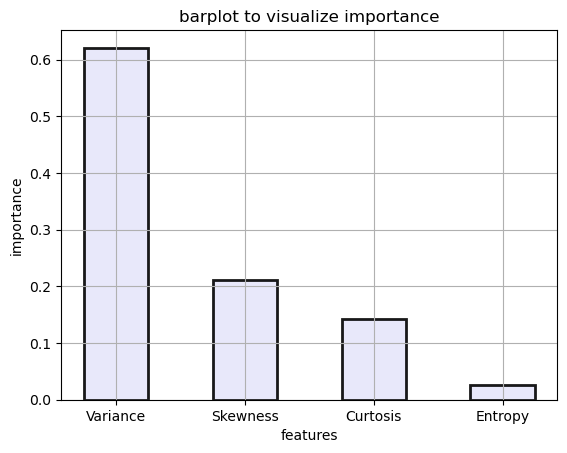

In [65]:
features=['Variance','Skewness','Curtosis','Entropy']
importance=[0.62095248, 0.21106862, 0.14189251, 0.02608639]
plt.title('barplot to visualize importance')
plt.xlabel('features')
plt.ylabel('importance')
plt.bar(features,importance,color='lavender',edgecolor='black',width=0.5,linewidth=2,alpha=0.9);
plt.grid() 

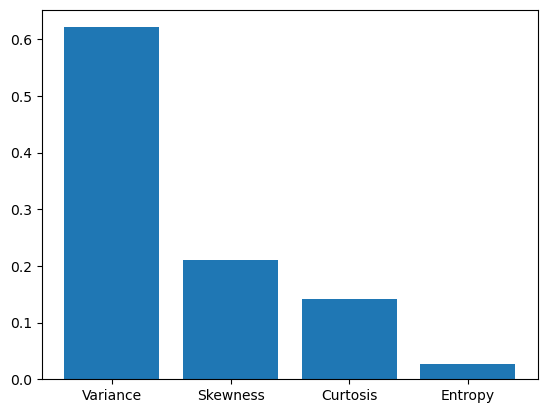

In [68]:
#or
plt.bar(x.columns,dt.feature_importances_);